In [5]:
import pandas as pd
combined_df = pd.read_excel('fix_fixed.xlsx')
combined_df

,Data,Label,translated,Unnamed: 3,review_text_cleaned
0,bangka blm bukan kantor pos ambil nya,1,bangka blm bukan kantor pos ambil nya,NaN,bangka belum bukan kantor pos ambil nya
1,halo min apa kpr sudah berjalan bisa minta di...,2,lingkaran cahaya min apa kpr sudah berjalan b...,NaN,lingkaran cahaya min apa kpr sudah berjalan bi...
2,perancis,1,perancis,NaN,perancis
3,kapan giveaway nya nih megamin [smirking face],0,kapan memberi secara gratis nya nih megamin w...,NaN,kapan memberi secara gratis nya ini megamin wa...
4,geh yang balam tau gak soto tangkar yang dulu ...,1,geh yang balam tau gak soto tangkar yang dulu...,NaN,geh yang balam tahu tidak soto tangkar yang du...
...,...,...,...,...,...
31994,kak brarti perlu download welma lagi kan utk b...,0,kak brarti perlu unduh welma lagi kan utk beli...,NaN,kak berarti perlu unduh welma lagi kan untuk b...
31995,semoga kita terhindar dari modus penipuan bri ...,0,semoga kita terhindar dari modus penipuan bri ...,NaN,semoga kita terhindar dari modus penipuan bri ...
31996,hah dimana tuh tahun kemaren ngajuin mintanya...,2,ha dimana tuh tahun kemaren ngajuin mintanya 2jt,NaN,tertawa di mana itu tahun kemarin ngajuin mint...
31997,masang nomor mudah mudahan aja bisa tembus tuh...,0,masang nomor mudah mudahan aja bisa tembus tuh...,NaN,memasang nomor mudah mudahan saja bisa tembus ...


In [6]:
combined_df = combined_df.dropna(subset=['review_text_cleaned'])
combined_df.reset_index(drop=True,inplace=True)

In [7]:
from nltk.corpus import stopwords
additional_stop = ['nya','yg','ga','gk','tp','nih','noh','lah','dong','pa','yuk','gak','ya','sih','yaa','aja', 'min', 'bca','brimo','biar','kak','blu','mega','allo','bank','bca','btn']
all_stopwords = stopwords.words('indonesian') + additional_stop

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X=combined_df['review_text_cleaned']
y=combined_df['Label']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.20,random_state=30)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
training_ratings = le.fit_transform(y_train)
val_ratings = le.transform(y_test)

In [11]:
val_ratings

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [12]:
vocab_size = 10000
embedding_dim = 64
max_length = 15
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [14]:
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'bank': 2,
 'wajah': 3,
 'dengan': 4,
 'hati': 5,
 'dan': 6,
 'mata': 7,
 'bisa': 8,
 'ada': 9,
 'saya': 10}

In [15]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[10])

[103, 2, 14, 5, 748, 5, 748, 5, 748]


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

35
15
29
15
9
15


In [17]:
validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

6388
(6388, 15)


In [18]:
import numpy as np
training_label_seq = np.array(y_train)
validation_label_seq = np.array(y_test)

In [19]:
np.shape(X_train)

(25549,)

In [20]:
from tensorflow import keras
import tensorflow as tf

def baseline_model():
  input_ = keras.layers.Input(1)
  embedding = keras.layers.Embedding(vocab_size, embedding_dim)(input_)
  bidirectional = keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim))(embedding)
  hidden1 = keras.layers.Dense(embedding_dim, activation='relu')(bidirectional)
  output = keras.layers.Dense(3, activation='softmax')(hidden1)
  model = keras.models.Model(inputs=[input_], outputs=[output])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [21]:
baseline_model = baseline_model()
baseline_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding (Embedding)       (None, 1, 64)             640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 714,499
Trainable params: 714,499
Non-trainable params: 0
_______________________________________________________

In [22]:
num_epochs = 10
history = baseline_model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=128)

Epoch 1/10
200/200 [==============================] - 9s 26ms/step - loss: 0.6988 - accuracy: 0.6899 - val_loss: 0.5563 - val_accuracy: 0.7606
Epoch 2/10
200/200 [==============================] - 4s 21ms/step - loss: 0.4986 - accuracy: 0.7960 - val_loss: 0.5533 - val_accuracy: 0.7699
Epoch 3/10
200/200 [==============================] - 4s 22ms/step - loss: 0.4221 - accuracy: 0.8341 - val_loss: 0.5723 - val_accuracy: 0.7611
Epoch 4/10
200/200 [==============================] - 4s 22ms/step - loss: 0.3669 - accuracy: 0.8582 - val_loss: 0.6137 - val_accuracy: 0.7530
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.3269 - accuracy: 0.8753 - val_loss: 0.6588 - val_accuracy: 0.7577
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2899 - accuracy: 0.8927 - val_loss: 0.6867 - val_accuracy: 0.7447
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2639 - accuracy: 0.9025 - val_loss: 0.7663 - val_accuracy: 0.7370

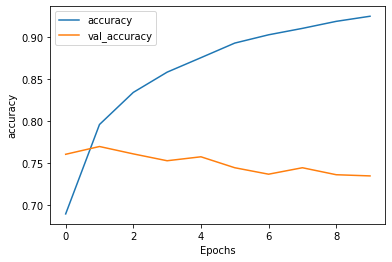

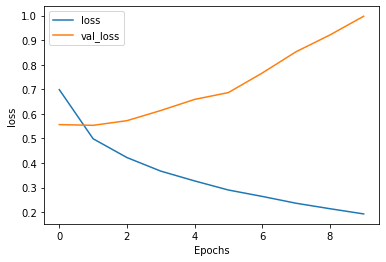

In [23]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [1]:
import tensorflow as tf
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(128, embedding_dim, input_length=max_length, mask_zero=True),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
  tf.keras.layers.Dense(16,kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),bias_regularizer = tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.LeakyReLU(alpha=0.3),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                        bias_regularizer  = tf.keras.regularizers.l2(0.01),
                        activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                        activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
  ])


opt = tf.keras.optimizers.Nadam(lr=0.0001, clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [3]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           8192      
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                18560     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
checkpoint_filepath = './checkpoint_model'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=100, callbacks=[callback, reduce_lr, model_checkpoint])

Epoch 1/30
256/256 [==============================] - 28s 53ms/step - loss: 8.1894 - accuracy: 0.3892 - val_loss: 7.5707 - val_accuracy: 0.5756 - lr: 1.0000e-04
Epoch 2/30
256/256 [==============================] - 8s 33ms/step - loss: 7.1354 - accuracy: 0.4963 - val_loss: 6.6267 - val_accuracy: 0.6079 - lr: 1.0000e-04
Epoch 3/30
256/256 [==============================] - 8s 33ms/step - loss: 6.2725 - accuracy: 0.5517 - val_loss: 5.8097 - val_accuracy: 0.6425 - lr: 1.0000e-04
Epoch 4/30
256/256 [==============================] - 8s 31ms/step - loss: 5.5366 - accuracy: 0.5868 - val_loss: 5.1493 - val_accuracy: 0.6451 - lr: 1.0000e-04
Epoch 5/30
256/256 [==============================] - 8s 32ms/step - loss: 4.8951 - accuracy: 0.6128 - val_loss: 4.5426 - val_accuracy: 0.6542 - lr: 1.0000e-04
Epoch 6/30
256/256 [==============================] - 8s 32ms/step - loss: 4.3342 - accuracy: 0.6313 - val_loss: 4.0328 - val_accuracy: 0.6760 - lr: 1.0000e-04
Epoch 7/30
256/256 [===================

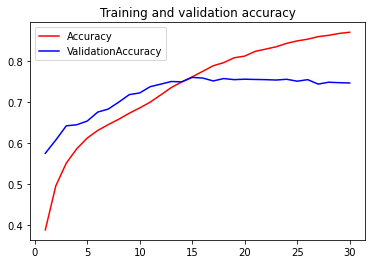

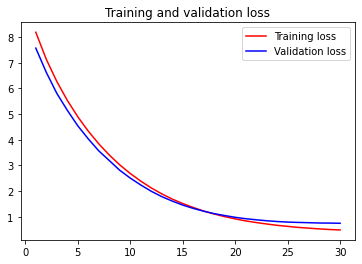

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Accuracy')
plt.plot(epochs, val_acc, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model_gru.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dense(3, activation='softmax'))

# try using different optimizers and different optimizer configs
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model_gru.summary())

Build model...
Summary of the built model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 100)           1000000   
                                                                 
 gru (GRU)                   (None, 32)                12864     
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,012,963
Trainable params: 1,012,963
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
tf.config.experimental_run_functions_eagerly(True)
print('Train...')
# labels = tf.reshape(training_label_seq, [-1])
# val_labels = tf.reshape(validation_label_seq, [-1])
num_classes = 3  # Replace 3 with the number of classes in your problem
labels = tf.one_hot(training_label_seq, depth=num_classes)
val_labels = tf.one_hot(validation_label_seq, depth=num_classes)
gru = model_gru.fit(train_padded, labels, batch_size=128, epochs=25, validation_data=(validation_padded, val_labels), verbose=2,callbacks=[callback, reduce_lr, model_checkpoint]) 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Train...
Epoch 1/25


c:\Users\jmspa\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


200/200 - 42s - loss: 0.4972 - accuracy: 0.6314 - val_loss: 0.3803 - val_accuracy: 0.7240 - lr: 0.0010 - 42s/epoch - 212ms/step
Epoch 2/25
200/200 - 43s - loss: 0.3541 - accuracy: 0.7577 - val_loss: 0.3359 - val_accuracy: 0.7680 - lr: 0.0010 - 43s/epoch - 213ms/step
Epoch 3/25
200/200 - 42s - loss: 0.3000 - accuracy: 0.8060 - val_loss: 0.3354 - val_accuracy: 0.7658 - lr: 0.0010 - 42s/epoch - 212ms/step
Epoch 4/25
200/200 - 43s - loss: 0.2670 - accuracy: 0.8346 - val_loss: 0.3470 - val_accuracy: 0.7675 - lr: 0.0010 - 43s/epoch - 213ms/step
Epoch 4: early stopping


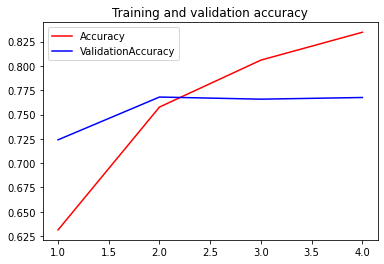

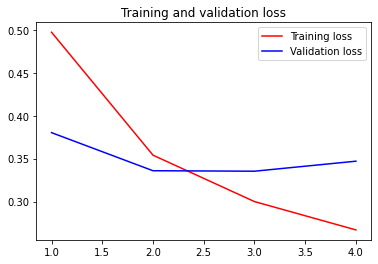

In [30]:
loss_gru = gru.history['loss']
val_loss_gru = gru.history['val_loss']
acc_gru = gru.history['accuracy']
val_acc_gru = gru.history['val_accuracy']
epochs_gru = range(1, len(acc_gru) + 1)
plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs_gru, acc_gru, 'red', label='Accuracy')
plt.plot(epochs_gru, val_acc_gru, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs_gru, loss_gru, 'red', label='Training loss')
plt.plot(epochs_gru, val_loss_gru, 'blue', label='Validation loss')
plt.legend()

plt.show()